# Métodos III - Derivadas 


## Introducción


*Author: Jose A. Hernando*, January 2019

*Particle Physics Deparment. Universidade de Santiago de Compostela, Spain.*


In [21]:
#%%html
#<style>
#.cell.selected~.unselected { display: none; }
#.cell.code_cell.unselected .input { display: none; }
#</style>

## Objectivos

Presentar los conceptos fundamentales del primer tema:


* funciones escalares y vectoriales
    
* derivadas de funciones de varias dimensiones

* desarrollo de Taylor de funciones de varias dimensiones

* máximos y mínimos de funciones de varias dimensiones

a través de cuestiones sobre algunas gráficas.


In [22]:
# general imports
%matplotlib inline

# numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

from mpl_toolkits.mplot3d import Axes3D
# possible styles: ggplot (simplicity), bmh (scientify data), 
matplotlib.style.use('ggplot')

# ploting images
from IPython.display import display, Image

Observa la siguiente figura:

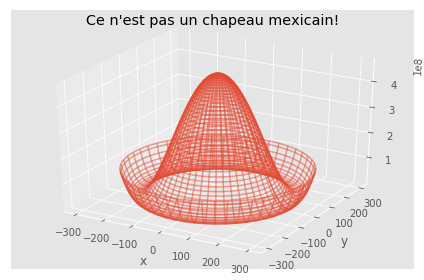

In [23]:
# create a grid in the [-300, 300] x [-300, 300] region
rs   = np.linspace(0.,     300, 100)
phis = np.linspace(0., 2*np.pi, 100)
# create xms, yms, the mesh used for the function
rms, pms = np.meshgrid(rs, phis)
# compute the values of the Higgs potential for the points in the grid
k = 0.13; v = 246. # GeV2
vms =  k*(rms**4) - 2*k*(v**2)*(rms**2) + k*(v**4)
xms = rms * np.cos(pms)
yms = rms * np.sin(pms)
# draw them!
fig = plt.figure() # figsize=(9, 7))
ax = fig.gca(projection='3d')
ax.plot_wireframe(xms, yms, vms, cmap='hot', alpha = 0.5);
plt.xlabel('x'); plt.ylabel('y'); plt.title("Ce n'est pas un chapeau mexicain!")
plt.tight_layout();

### Cuestiones

*Cuestiones sobre continuidad y límites*

Supongo que recuerdas los conceptos de límite, continuidad y derivada de funciones de una dimensión, con ellos en mente, intenta contestar a las siguientes cuestiones, fundamentalmente con palabras y quizás con algún dibujo.

* ¿Qué es esta figura? ¿Qué forma tiene? Descríbela.

* ¿Es continua la función que da lugar a esta gráfica? ¿Tiene límite en el origen? ¿Y en resto de los puntos?



***

*Cuestiones sobre derivadas*

* Sabemos que el concepto de derivada de una función de una dimensión está relacionado con la pendiente de su gráfica. En este caso, ¿crees que se puede extender el concepto de pendiente a la función de la gráfica de la figura? 


* Pero es algo más complicado ¿no? Ahora depende de hacia qué dirección se mueva uno. Imagina que nos colocamos en el origen y nos desplazamos a lo largo del eje $x$. ¿Cómo será la pendiente de la gráfica? ¿Puedes hacer una dibujo aproximado de la pendiente a lo largo del eje $x$?


* Ahora colócate a una distancia del origen y muévete a lo largo de una circunferencia, eso sí, centrada en el origen. ¿Cambia la pendiente? ¿Cómo es el valor de la función en todos los puntos de ese circunferencia?


* Intenta ahora quedarse sólo con los puntos de la gráfica que están a una misma altura. Si proyectas esos puntos sobre el plano horizontal, el plano $(x, y)$. ¿Qué figura geométrica obtienes? ¿Es una circunferencia? 


***

*Cuestiones sobre la simetría*

* ¿Esta gráfica tiene alguna simetría? Imagina la situación siguiente: te vendo los ojos, y mientras no puedes ver, giro o no la figura respesto al eje $z$ un determinado ángulo, luego te quito la venda y te pregunto ¿Puedes decirme si he guirado la figura?


* Habitualmente usamos las coordenadas cartesianas $(x, y)$ pero en este caso, crees que hay otras coordenadas que facilitan el dibujo de la gráfica, que reflejan que la gráfica tiene una simetría. ¿Cuáles serían?


* Intenta leer ahora el código *Python* de la celda que crea la figura. ¿Cuáles son las variables que se han utilizado para dibujarla? ¿Puedes decir qué son las variables *rs* y las variables *phis* del código?


* Secciona ahora la gráfica de forma vertical, (cártala como si tuvieses un cuchillo), eso si, pasando siempre por el origen. ¿Cuál es la sección de la superficie que quedaría? ¿Sería la misma independiente de en qué ángulo cortes la gráfica?


***

*Cuestiones sobre máximos y mínimos*

* ¿Te acuerdas cómo se calculaban los máximos y los mínimos en funciones de una dimensión? Fíjate de nuevo en la gráfica. ¿Identificas el máximo local? ¿Y los mínimos? ¿Cuánto valdría la pendiente de la gráfica en los puntos mínimos y máximos?


* La superficie *parece* una superficie, pero fíjate bien, en realidad *no es* exactamente una superficie, solo lo parece. ¿Cómo está dibujada? Suponto que te has dado cuenta, es obvio aunque a veces cuesta verlo: está dibujada con una especie de piececitas, como con teselas de un mosaico. 


* Recuerda por un momento el desarrollo de Taylor de una función de una dimensión. En primer orden, podíamos aproximar en un intervalo pequeño, la gráfica de la función a una recta, cuya pendiente era, claro, la derivada. Ahora fíjate de nuevo en las teselas del mosaico. Tienen pinta de ser pequeños trozos de plano ¿verdad? Uno podría decir que si una función escalar de dos dimensiones, como la de la figura, tiene desarrollo de Taylor de primer orden, su gráfica en un trozo pequeñito se podrá aproximar a un ... (está claro, ¿no?).

### Ejercicios

Vamos a hace unos ejercicios sencillos:

1. En la siguiente celda, dibujamos una recta que pasa por el origen y que tiene pendiente unidad. Fíjate en el código. Ahora, ¿puedes tu dibujar la recta que pasa por el punto $(1, -1)$ con pendiente -1?


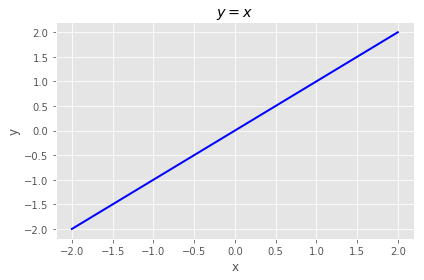

In [24]:
# create a partition of interval [-2, 2] in 100 bins
xs   = np.linspace(-2., 2., 100)
# the parameters of the stright line, a: slope, b: offset
a, b = 1., 0.
# the equation of the straight line, y is now an array of the same dimension of x,
ys   = a*xs + b
# plot the straight line with blue color and line width 2
plt.plot(xs, ys, color='blue', lw=2);
plt.xlabel('x'); plt.ylabel('y'); plt.title('$y = x$')
plt.tight_layout();

2. También hemos dibujado un plano, en este caso, el plano que pasa por el origen, sin pendiente en la dirección $x$ y pendiente $1$ en la dirección $y$, eso es $z=y$. Fíjate nuevamente en cómo lo hemos dibujado y cómo la altura también esta marcada por la regla de color. Ten cuidado, a veces no queda claro dónde está el origen.

  2.a) ¿Crees que puedes dibujar el plano que pasa por el origen y tenga pendiente $1$ en $x$ y pendiente $+1$ en $y$? ¿Y un plano con esas pendientes pero que pase por el punto $(0, 0, 1)$?

  2.b) Hagámoslo un poco más dificil: dibuja el plano que pasa por el punto (1, 1, 0) con pendiente $-1$ en la dirección $x$ y $-1$ en $y$?

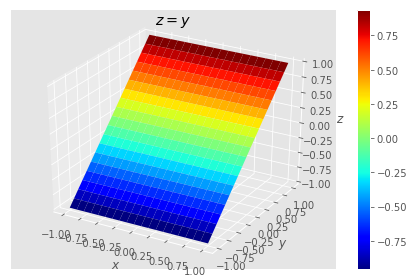

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
# create two arrays, xs, ys, with 20 points equally spaced between [0., 1]
xs = np.linspace(-1., 1., 20)
ys = np.linspace(-1., 1., 20)
# create a 2D mesh with the (xs, ys), 
xms, yms = np.meshgrid(xs, ys)
# Slope in x: a, slope in y: b, z-offset at origin: c
a, b, c  = 0., 1., 0. 
# zms is the values of the plane
zms      = a*xms +b*yms +c
# plot
sf = ax.plot_surface(xms, yms, zms, cmap='jet'); fig.colorbar(sf, ax=ax)
ax.set_xlabel('$x$'); ax.set_ylabel('$y$'); ax.set_zlabel('$z$'); ax.set_title('$z = y$')
fig.tight_layout();

3. Por último mira el código de esta tercera celda y la gráfica de la función de una dimensión, $f(x) = sin(x)/x$. Refresca tus conocimientos y calcula el límite de esa función en el origen. 

Imagina ahora que los valores de $f(x)$ están en el eje $z$ y que haces girar la gráfica en torno a ese eje. ¿Te imaginas cómos quedaría la figura? ¿Puedes intentar escribir el código y dibujarla? Ayúdate del ejemplo con el que hemos empezado esta sección, el del sombrero mexicano. ¿Dónde estarían los máximos y mínimos de esta nueva gráfica?

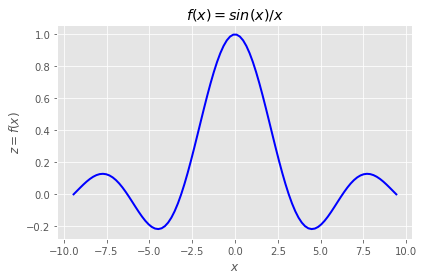

In [26]:
# create an array between [-3 pi, 3 pi] in units of 0.2
xs = np.linspace(-3.*np.pi, 3.*np.pi, 100)
# compute the function sin(x)/x for the xs array
ys = np.sin(xs)/xs

# plot the arrays, that simulates plotting the function
plt.plot(xs, ys, color='blue', lw=2)
plt.xlabel('$x$'); plt.ylabel('$z = f(x)$'), plt.title('$f(x) = sin(x)/x$')
plt.tight_layout();

###  ¡Aún hay más!

La primera gráfica, la del sombrero mexicano, corresponde al potencial del campo del bosón de Higgs, que es la piedra angular del modelo teórico de Física de Partículas. El bosón de señor Higgs se descubrió en el año 2012 en el CERN, cuarenta años después de que Englert (a la izquierda en la imagen) y Higgs (derecha) lo propusieran, y por lo que los dos recibieron el premio Nobel en 2013.

<img src="imgs/higgs_foto.jpeg" />

Aqui está un enlace sobre el Higgs de la academia sueca: https://www.nobelprize.org/uploads/2018/06/popular-physicsprize2013-1.pdf. Y aquí la página del CERN: https://home.cern.
Y por último, una explicación sencilla de cómo actua el bosón de Higgs,
https://www.youtube.com/watch?v=QG8g5JW64BA. Fíjate en la camisa del prefesor Ellis, que es quien aparece en el vídeo,  ¡El término $V(\phi)$ en la última línea de su camiseta es el que hemos dibujado en la primera figura!


### ¡Esto es todo por ahora!